In [1]:
#dataframes
import pandas as pd
import h5py

#speedup
import multiprocessing as mp

#suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.TimeSeries = pd.Series 

#math
import numpy as np
import math as m
from scipy.spatial.distance import cdist
from scipy import signal

#plots
import pylab as plt
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as ticker
from matplotlib import colors
import matplotlib
from figurefirst import FigureLayout,mpl_functions
import figurefirst
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1 import make_axes_locatable # for colorbar
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
import matplotlib.colors as mcolors
import figurefirst as fifi
from IPython.display import display,SVG

#misc
import cairosvg
import time
np.set_printoptions(suppress=True)
import fly_plot_lib.plot as fpl
FS=7

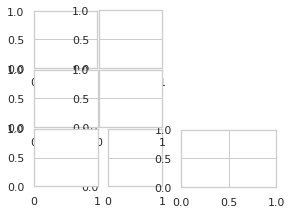

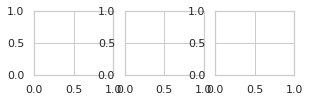

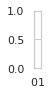

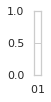

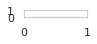

In [6]:
layout = fifi.svg_to_axes.FigureLayout('../../../Figure/fig3.svg',
                                           autogenlayers=True, make_mplfigures=True, hide_layers=[])

### Panel A

In [19]:
dir = '~/DataAnalysis/data/Sprints/LowRes/'
df = pd.read_hdf(dir+'NotWindy.h5')
dt= df.master_time[1]-df.master_time[0]
df = df[df['time'].between(100,300)]
df.reset_index(inplace=True, drop=True) 

def streakline_container(eastwest,northsouth):

    for i in range((len(eastwest))-1,-1, -1): 
        eastwest = np.resize(np.array([eastwest-df.corrected_u[i]*dt]),(1,i)).flatten() 
        northsouth = np.resize(np.array([northsouth-df.corrected_v[i]*dt]),(1,i)).flatten()
        x.loc[i]=np.pad(eastwest, ((len(df)-len(eastwest)),0),'constant', constant_values=(0))
        y.loc[i]=np.pad(northsouth, ((len(df)-len(northsouth)),0),'constant', constant_values=(0))

def streakline_calculation(df):
    et = [np.sum(df.corrected_u[j:])*dt for j in range(0,len(df))]
    nt = [np.sum(df.corrected_v[j:])*dt for j in range(0,len(df))]
    return et, nt

def prepare_df(df):
    df.pop(df.columns[0])
    strings=[]
    for i in range(len(df)-1,0,-1):
        strings.append("p"+str(i))
    df.columns=strings
    df.reset_index(inplace=True, drop=True) 
    return df

    
et, nt = streakline_calculation(df)

strings=[]
for i in range(len(df)):
    strings.append("p"+str(i))

x=pd.DataFrame(columns=strings,index=range(len(df)))
y=pd.DataFrame(columns=strings,index=range(len(df)))
streakline_container(et,nt)
x=prepare_df(x)
y=prepare_df(y)

In [20]:
ax=layout.axes[('fig1','sta')]
i=779
area = (np.arange(start = i, stop = 0 , step = -1)) #area
ax.scatter(x.loc[i][x.loc[i]!=0],y.loc[i][y.loc[i]!=0], c='#febf6e', s=np.power(area,0.7), 
           edgecolors='none', rasterized=True)

ax.plot(df.xsrc[i],df.ysrc[i],marker='*', markersize=5, c='green', rasterized=True)

var = ax.scatter(df.xsrc[:i],df.ysrc[:i], c = df.odor[:i],
                     cmap = 'inferno_r', vmin =0 , vmax = 10, s = 0.09,rasterized=True )       
# c_bar(ax, var)
ax.grid(False)
ax.axes.axis('off')
ax.autoscale(enable=True)
ax.set_xlim(-5,15)
ax.set_ylim(-5,25)

# ax.text(-2, 20,"t= " + str('{:.4g}'.format(df.time[i]))+ " s")
ax.set_rasterization_zorder(-20)
figurefirst.mpl_functions.set_fontsize(ax,FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../../Figure/fig3.svg')


In [21]:

ax=layout.axes[('fig1','stb')]
i=987
area = (np.arange(start = i, stop = 0 , step = -1)) #area
ax.scatter(x.loc[i][x.loc[i]!=0],y.loc[i][y.loc[i]!=0], c='#febf6e', s=np.power(area,0.7), 
           edgecolors='none',rasterized=True)

ax.plot(df.xsrc[i],df.ysrc[i],marker='*', markersize=5, c='green', rasterized=True)

var = ax.scatter(df.xsrc[:i],df.ysrc[:i], c = df.odor[:i],
                     cmap = 'inferno_r', vmin =0 , vmax = 10, s = 0.09,rasterized=True )       
ax.grid(False)
ax.axes.axis('off')
ax.autoscale(enable=True)
ax.set_xlim(-5,15)
ax.set_ylim(-5,25)

# ax.text(-2, 20,"t= " + str('{:.4g}'.format(df.time[i]))+ " s")
ax.set_rasterization_zorder(-20)
figurefirst.mpl_functions.set_fontsize(ax,FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../../Figure/fig3.svg')

In [22]:
ax=layout.axes[('fig1','stc')]
i=1089
area = (np.arange(start = i, stop = 0 , step = -1)) #area
ax.scatter(x.loc[i][x.loc[i]!=0],y.loc[i][y.loc[i]!=0], c='#febf6e', s=np.power(area,0.7), 
           edgecolors='none', rasterized=True)

ax.plot(df.xsrc[i],df.ysrc[i],marker='*', markersize=5, c='green', rasterized=True)

var = ax.scatter(df.xsrc[:i],df.ysrc[:i], c = df.odor[:i],
                     cmap = 'inferno_r', vmin =0 , vmax = 10, s = 0.09,rasterized=True )       
ax.grid(False)
ax.axes.axis('off')
ax.autoscale(enable=True)
ax.set_xlim(-5,15)
ax.set_ylim(-5,25)

# ax.text(-4, 20,"t= " + str('{:.4g}'.format(df.time[i]))+ " s")
ax.set_rasterization_zorder(-20)
figurefirst.mpl_functions.set_fontsize(ax,FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../../Figure/fig3.svg')

In [23]:
ax=layout.axes[('fig1','std')]
i=1143
area = (np.arange(start = i, stop = 0 , step = -1)) #area
ax.scatter(x.loc[i][x.loc[i]!=0],y.loc[i][y.loc[i]!=0], c='#febf6e', s=np.power(area,0.7), 
           edgecolors='none',rasterized=True)

ax.plot(df.xsrc[i],df.ysrc[i],marker='*', markersize=5, c='green', rasterized=True)

var = ax.scatter(df.xsrc[:i],df.ysrc[:i], c = df.odor[:i],
                     cmap = 'inferno_r', vmin =0 , vmax = 10, s = 0.09,rasterized=True )       
ax.grid(False)
ax.axes.axis('off')
ax.autoscale(enable=True)
ax.set_xlim(-10,15)
ax.set_ylim(-5,25)

# ax.text(-4, 20,"t= " + str('{:.4g}'.format(df.time[i]))+ " s")
ax.set_rasterization_zorder(-20)
figurefirst.mpl_functions.set_fontsize(ax,FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../../Figure/fig3.svg')

In [24]:
ax=layout.axes[('fig1','ste')]
i=1179
area = (np.arange(start = i, stop = 0 , step = -1)) #area
ax.scatter(x.loc[i][x.loc[i]!=0],y.loc[i][y.loc[i]!=0], c='#febf6e', s=np.power(area,0.7), 
           edgecolors='none',rasterized=True)

ax.plot(df.xsrc[i],df.ysrc[i],marker='*', markersize=5, c='green', rasterized=True)

var = ax.scatter(df.xsrc[:i],df.ysrc[:i], c = df.odor[:i],
                     cmap = 'inferno_r', vmin =0 , vmax = 10, s = 0.09,rasterized=True )       
ax.grid(False)

ax.autoscale(enable=True)
ax.set_xlim(-10,15)
ax.set_ylim(-5,25)

mpl_functions.adjust_spines(ax,['left','bottom'],
                            spine_locations={'left': 5, 'bottom': 5}, 
                            smart_bounds=True,
                            xticks=[-10,15],
                            yticks=[-5,25],
                            linewidth=0.5)

# ax.text(-4, 20,"t= " + str('{:.4g}'.format(df.time[i]))+ " s")
ax.set_rasterization_zorder(-20)
figurefirst.mpl_functions.set_fontsize(ax,FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../../Figure/fig3.svg')

In [25]:
ax=layout.axes[('fig1','stf')]
i=1210
area = (np.arange(start = i, stop = 0 , step = -1)) #area
ax.scatter(x.loc[i][x.loc[i]!=0],y.loc[i][y.loc[i]!=0], c='#febf6e', s=np.power(area,0.7), 
           edgecolors='none',rasterized=True)

ax.plot(df.xsrc[i],df.ysrc[i],marker='*', markersize=5, c='green', rasterized=True)

var = ax.scatter(df.xsrc[:i],df.ysrc[:i], c = df.odor[:i],
                     cmap = 'inferno_r', vmin =0 , vmax = 10, s = 0.05,rasterized=True )       
ax.grid(False)
ax.axes.axis('off')
ax.autoscale(enable=True)
ax.set_xlim(-10,15)
# ax.axline((0,0), slope=-1, linestyle='dashed', linewidth=2, color='r', alpha=0.
ax.set_ylim(-5,25)

# ax.text(-4, 20,"t= " + str('{:.4g}'.format(df.time[i]))+ " s")
ax.set_rasterization_zorder(-20)
figurefirst.mpl_functions.set_fontsize(ax,FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../../Figure/fig3.svg')

### Color Bar 1

In [26]:
ax = layout.axes[('cbar1', 'cbar1')]

fpl.colorbar(ax=ax, colormap='inferno_r', orientation='vertical', ticks=[0,10],vmi=0,vma=10)
mpl_functions.adjust_spines(ax, ['right'], 
                                    smart_bounds=True,
                                    spine_locations={'right': 1}, 
                                    yticks=[0, 10],
                                    tick_length=2.5,
                                    linewidth=0.5)

ax.set_ylabel("Odor, v",rotation=-90, labelpad=-9)

ax.set_yticklabels(['0', '10'])
ax.set_rasterization_zorder(-20)
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['cbar1'], 'cbar1', cleartarget=True)
layout.write_svg('../../../Figure/fig3.svg')

### Panel C - Encounter Map Plots


In [2]:
df1 = pd.read_hdf('~/DataAnalysis/data/Sprints/HighRes/Windy/WindyMASigned.h5')
df2 = pd.read_hdf('~/DataAnalysis/data/Sprints/HighRes/NotWindy/NotWindyMASigned.h5')
df3 = pd.read_hdf('~/DataAnalysis/data/Sprints/HighRes/Forest/ForestMASigned.h5')

q='odor>4.5'
dfdist1=df1.query(q)
dfdist2=df2.query(q)
dfdist3=df3.query(q)

dataframes=[dfdist1,dfdist2,dfdist3]
data=[df1,df2,df3]

In [261]:
ax = layout.axes[('fig3', 'mapa')]
ax.grid(False)
# ax.hist2d(df1.distance_from_source_a*df1.xsign,
#                     df1.nearest_from_streakline*df1.ysign,
#                     cmap='Greys',bins=20, alpha=0.3,norm=colors.LogNorm())

hist, xedges, yedges = np.histogram2d(df1.distance_from_source_a*df1.xsign,
                                      df1.nearest_from_streakline*df1.ysign, 
                                      bins=20, normed=False)

dt=df1.master_time[1]-df1.master_time[0]
counts_dt = hist * dt
counts_dt = np.nan_to_num(counts_dt, nan=0.0, posinf=0.0, neginf=0.0)



pc = ax.pcolormesh(xedges, yedges, counts_dt.T, 
                   cmap='Greys', norm=colors.LogNorm(),rasterized=True) 

# ax.scatter(dataframes[0].distance_from_source_a*dataframes[0].xsign,
#                     dataframes[0].nearest_from_streakline*dataframes[0].ysign,
#                     c=dataframes[0].odor, cmap='inferno_r',vmin=0,vmax=10,
#            edgecolors='none', s=5,alpha=0.2, rasterized=True )


ax.axhline(0, color = 'grey', alpha=0.5)
ax.axvline(0, color = 'grey', alpha=0.5)
ax.plot(0,0,marker='o',  c='#fd6549ff', markersize=7, alpha=0.8, rasterized=True)

ax.set_rasterization_zorder(-20)


mpl_functions.adjust_spines(ax,['left', 'bottom'],spine_locations={'left': 5, 'bottom': 5}, 
                            smart_bounds=True, 
                            xticks=[0,50],
                            yticks=[-25,25], 
                            linewidth=0.5)

figurefirst.mpl_functions.set_fontsize(ax,FS)
layout.append_figure_to_layer(layout.figures['fig3'], 'fig3', cleartarget=True)
layout.write_svg('../../../Figure/fig3.svg')

In [262]:
ax = layout.axes[('fig3', 'mapb')]
ax.grid(False)

# ax.hist2d(df2.distance_from_source_a*df2.xsign,
#                     df2.nearest_from_streakline*df2.ysign,
#                     cmap='Greys',bins=20, alpha=0.3,norm=colors.LogNorm(),rasterized=True)


hist, xedges, yedges = np.histogram2d(df2.distance_from_source_a*df2.xsign,
                                      df2.nearest_from_streakline*df2.ysign, 
                                      bins=20, normed=False)

counts_dt = hist * dt
counts_dt = np.nan_to_num(counts_dt, nan=0.0, posinf=0.0, neginf=0.0)



pc = ax.pcolormesh(xedges, yedges, counts_dt.T, 
                   cmap='Greys', norm=colors.LogNorm(),rasterized=True) 

# ax.scatter(dataframes[1].distance_from_source_a*dataframes[1].xsign,
#                     dataframes[1].nearest_from_streakline*dataframes[1].ysign,
#                     c=dataframes[1].odor, cmap="inferno_r", vmin=0,vmax=10,
#            edgecolors='none', s=5,alpha=0.2, rasterized=True)
ax.set_ylim(-25,25)

ax.axhline(0, color = 'grey', alpha=0.5)
ax.axvline(0, color = 'grey', alpha=0.5)
ax.plot(0,0,marker='o',  c='#fd6549ff', markersize=7, alpha=0.8, rasterized=True)

ax.set_rasterization_zorder(-20)


mpl_functions.adjust_spines(ax,['bottom'],spine_locations={'bottom': 5}, 
                            smart_bounds=True, 
                            xticks=[0,50],
                            
                            linewidth=0.5)

figurefirst.mpl_functions.set_fontsize(ax,FS)
layout.append_figure_to_layer(layout.figures['fig3'], 'fig3', cleartarget=True)
layout.write_svg('../../../Figure/fig3.svg')

In [263]:
ax = layout.axes[('fig3', 'mapc')]
ax.grid(False)
# ax.hist2d(df3.distance_from_source_a*df3.xsign,
#                     df3.nearest_from_streakline*df3.ysign,
#                     cmap='Greys',bins=20, alpha=0.3,norm=colors.LogNorm(),rasterized=True)

hist, xedges, yedges = np.histogram2d(df3.distance_from_source_a*df3.xsign,
                                      df3.nearest_from_streakline*df3.ysign, 
                                      bins=20, normed=False)

counts_dt = hist * dt
counts_dt = np.nan_to_num(counts_dt, nan=0.0, posinf=0.0, neginf=0.0)


pc = ax.pcolormesh(xedges, yedges, counts_dt.T, 
                   cmap='Greys', norm=colors.LogNorm(),rasterized=True) 

# ax.scatter(dataframes[2].distance_from_source_a*dataframes[2].xsign,
#                     dataframes[2].nearest_from_streakline*dataframes[2].ysign,
#                     c=dataframes[2].odor, cmap="inferno_r", vmin=0,vmax=10,
#            edgecolors='none', s=5,alpha=0.2, rasterized=True)
ax.set_ylim(-25,25)

ax.axhline(0, color = 'grey', alpha=0.5)
ax.axvline(0, color = 'grey', alpha=0.5)
ax.plot(0,0,marker='o',  c='#fd6549ff', markersize=7, alpha=0.8, rasterized=True)

ax.set_rasterization_zorder(-20)


mpl_functions.adjust_spines(ax,['bottom'],spine_locations={'bottom': 5}, 
                            smart_bounds=True, 
                            xticks=[0,50],
                           
                            linewidth=0.5)

figurefirst.mpl_functions.set_fontsize(ax,FS)
layout.append_figure_to_layer(layout.figures['fig3'], 'fig3', cleartarget=True)
layout.write_svg('../../../Figure/fig3.svg')

### Colorbar 2

In [31]:
ax = layout.axes[('cbar2', 'cbar2')]
ytic=[4.5,11]

fpl.colorbar(ax=ax, colormap='inferno_r', orientation='vertical',ticks=ytic)
ax.set_rasterization_zorder(-20)
mpl_functions.adjust_spines(ax, ['right'], 
                                    smart_bounds=True,
                                    spine_locations={'right': 1}, 
                                    yticks=ytic,
                                    tick_length=1.5,
                                    linewidth=0.5)

ax.set_ylabel("Odor, v",rotation=90, labelpad=-16)

ax.set_yticklabels(['4.5', '10'])
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['cbar2'], 'cbar2', cleartarget=True)
layout.write_svg('../../../Figure/fig3.svg')

### Colorbar 3

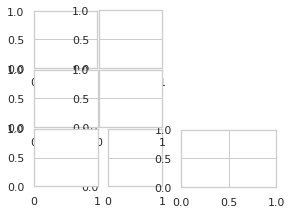

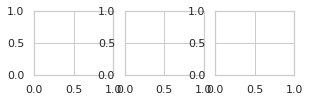

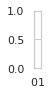

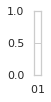

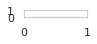

In [260]:
import matplotlib.colors as mcolors
layout = fifi.svg_to_axes.FigureLayout('../../../Figure/fig3.svg',
                                           autogenlayers=True, make_mplfigures=True, hide_layers=[])

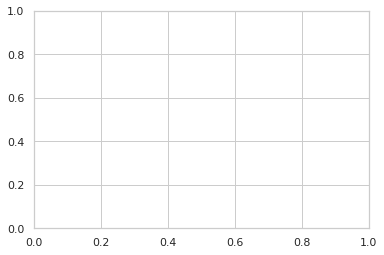

In [7]:
ax = layout.axes[('figGreyCbar', 'cbar_4')]
# xtic=[0,400]
ax.grid(False)

hist, xedges, yedges = np.histogram2d(df1.distance_from_source_a*df1.xsign,
                                      df1.nearest_from_streakline*df1.ysign, 
                                      bins=20, normed=False)

dt=df1.master_time[1]-df1.master_time[0]
counts_dt = hist * dt
counts_dt = np.nan_to_num(counts_dt, nan=0.0, posinf=0.0, neginf=0.0)


ax.grid(False)  # Explicitly remove grid lines
pc = ax.pcolormesh(xedges, yedges, counts_dt.T, 
                   cmap='Greys', norm=colors.LogNorm(), rasterized=True)  # Transpose counts_dt to align with coordinate system


# cbar = plt.(pc, ax=ax, orientation='horizontal')
cbar = plt.colorbar(pc, cax=ax,orientation='horizontal');
cbar.outline.set_visible(False)
cbar.ax.xaxis.set_minor_locator(ticker.NullLocator())
cbar.ax.tick_params(width=0.3)  

cbar.ax.tick_params(labelsize=1)  
ax.set_rasterization_zorder(-20)
ax.set_xlabel("Time Spent, s",rotation=0, labelpad=0)

figurefirst.mpl_functions.set_fontsize(ax, FS)

# layout.append_figure_to_layer(layout.figures['figGreyCbar'], 'figGreyCbar', cleartarget=True)
# layout.write_svg('../../../Figure/fig3.svg')

In [8]:
counts_dt

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.39472651,   1.66884375,
          4.84164548, 362.07413793,  64.09059501,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          1.32408261,   1.96863604,   2.40333486,   0.5496192 ,
          9.49841905, 142.54124069,  86.29021406,   0.96433187,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   1.17418647,   2.21346641,
          0.73449111,   0.        ,   0.        ,   0.        ,
         24.29316854,  82.29298353,  93.92492437,  18.85193849,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ],
       [  1.80874681,   1.96863604,  

In [9]:
np.ma.masked_equal(counts_dt, 0).min()

0.07994461059570312